## K-NN and Naïve Bayes Models 

In [97]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [98]:
# grab data and split
df = pd.read_csv("../DAP2/processeddata/2018_Financial_Data.csv", index_col=0)
target_cols = ['priceCashFlowRatio', 
               'priceEarningsRatio', 
               'priceEarningsToGrowthRatio', 
               'priceBookValueRatio', 
               'currentRatio', 
               'quickRatio',
               'payoutRatio']
X = df[target_cols]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN Model 

Highest Accuracy (no-reg): 0.7515274949083504 at k = 29
Highest Accuracy (reg): 0.7406653088934148 at k = 29


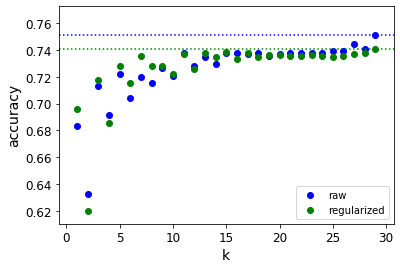

In [115]:
# create and fine tune kNN model
from sklearn.neighbors import KNeighborsClassifier

# find optimal k 
k_range = range(1,30)
scores = []
reg_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    # primary fit
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    # regularized fit
    knn.fit(X_train_scaled, y_train)
    reg_scores.append(knn.score(X_test_scaled, y_test))
    
# plot scores and find maximum
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores, c='b')
plt.scatter(k_range, reg_scores, c='g')
plt.legend(['raw', 'regularized'])
m = max(scores)
mR = max(reg_scores)
m_index = scores.index(m)+1
m_indexR = reg_scores.index(mR)+1
plt.axhline(y=m, color='b', linestyle=':')
plt.axhline(y=mR, color='g', linestyle=':')
print('Highest Accuracy (no-reg):',m,'at k =',m_index)
print('Highest Accuracy (reg):',mR,'at k =',m_indexR)

Best Partition (no-reg): 0.756723716381418 training on 50.0 % data
Best Partition (reg): 0.7501909854851031 training on 80.0 % data


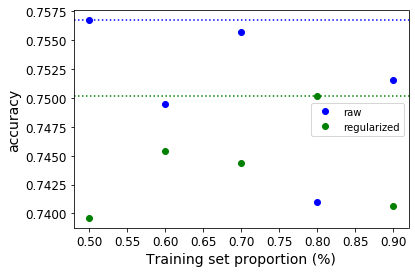

In [118]:
# find optimal testing versus training split size
num_tests = 100 # testing threshold 
t = [0.5, 0.6, 0.7, 0.8, 0.9]
knn = KNeighborsClassifier(n_neighbors = m_indexR)
plt.figure()

nr = []
r = []
for s in t:
    scores = []
    reg_scores = []
    for i in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state=0)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # normal fit
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
        # regularized fit 
        knn.fit(X_train_scaled, y_train)
        reg_scores.append(knn.score(X_test_scaled, y_test))
        
    nr.append(np.mean(scores))
    plt.plot(s, nr[-1], 'bo')
    r.append(np.mean(reg_scores))
    plt.plot(s, r[-1], 'bo', c='g')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.legend(['raw', 'regularized'])
md = max(nr)
mdR = max(r)
md_index = t[nr.index(md)]
md_indexR = t[r.index(mdR)]
plt.axhline(y=md, color='b', linestyle=':')
plt.axhline(y=mdR, color='g', linestyle=':')
print('Best Partition (no-reg):',md,'training on',md_index*100,'% data')
print('Best Partition (reg):',mdR,'training on',md_indexR*100,'% data')

## Naïve Bayes Model

In [121]:
# re-split and train data for fresh start
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# create and find optimal NB
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
print('Non-Regularized')
print('Accuracy on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

nbclf = GaussianNB().fit(X_train_scaled, y_train)
print('\nRegularized')
print('Accuracy on training set: {:.2f}'
     .format(nbclf.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.2f}'
     .format(nbclf.score(X_test_scaled, y_test)))

Non-Regularized
Accuracy on training set: 0.73
Accuracy on test set: 0.74

Regularized
Accuracy on training set: 0.73
Accuracy on test set: 0.74


Best Partition (reg): 0.732620320855615 training on 80.0 % data


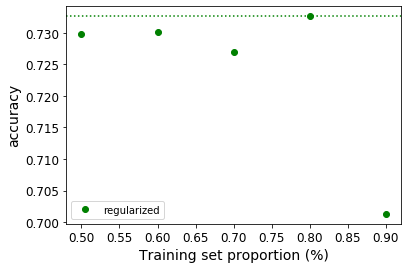

In [127]:
# find optimal testing vs training split size
num_tests = 1000 # testing threshold 
t = [0.5, 0.6, 0.7, 0.8, 0.9]
plt.figure()

r = []
for s in t:
    reg_scores = []
    for i in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state=0)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # regularized fit 
        nbclf = GaussianNB().fit(X_train_scaled, y_train)
        reg_scores.append(nbclf.score(X_test_scaled, y_test))
        
    r.append(np.mean(reg_scores))
    plt.plot(s, r[-1], 'bo', c='g')
    
# plot results
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.legend(['regularized'])
mdR = max(r)
md_indexR = t[r.index(mdR)]
plt.axhline(y=mdR, color='g', linestyle=':')
print('Best Partition (reg):',mdR,'training on',md_indexR*100,'% data')